In [1]:
from os import path

import openTSNE
import openTSNE.callbacks

from examples import utils

import numpy as np
import scipy.sparse as sp
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
import gzip
import pickle

with gzip.open(path.join("..", "data", "macosko_2015.pkl.gz"), "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y, cluster_ids = data["CellType1"], data["CellType2"]

In [3]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


In [4]:
N_THREADS = 4

In [5]:
def plot(x, y, **kwargs):
    utils.plot(x, y, colors=utils.MACOSKO_COLORS, **kwargs)

In [6]:
def rotate(degrees):
    phi = degrees * np.pi / 180
    return np.array([
        [np.cos(phi), -np.sin(phi)],
        [np.sin(phi), np.cos(phi)],
    ])

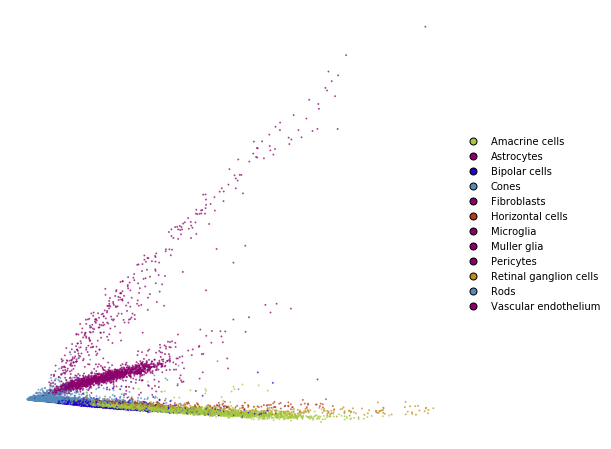

In [7]:
plot(x, y)

### Ordinary t-SNE

In [8]:
tsne = openTSNE.TSNE(
    perplexity=30,
    metric="euclidean",
    initialization="random",
    callbacks=openTSNE.callbacks.ErrorLogger(),
    random_state=3,
    n_jobs=N_THREADS,
)
embedding = tsne.fit(x)

Iteration   50, KL divergence  6.9036, 50 iterations in 4.8035 sec
Iteration  100, KL divergence  5.8490, 50 iterations in 4.6414 sec
Iteration  150, KL divergence  5.5915, 50 iterations in 5.1917 sec
Iteration  200, KL divergence  5.5157, 50 iterations in 4.6856 sec
Iteration  250, KL divergence  5.4786, 50 iterations in 4.7059 sec
Iteration   50, KL divergence  4.2040, 50 iterations in 5.0005 sec
Iteration  100, KL divergence  3.8203, 50 iterations in 5.2200 sec
Iteration  150, KL divergence  3.6045, 50 iterations in 5.1878 sec
Iteration  200, KL divergence  3.4581, 50 iterations in 5.2776 sec
Iteration  250, KL divergence  3.3493, 50 iterations in 5.9039 sec
Iteration  300, KL divergence  3.2641, 50 iterations in 6.1645 sec
Iteration  350, KL divergence  3.1953, 50 iterations in 7.0562 sec
Iteration  400, KL divergence  3.1385, 50 iterations in 7.6530 sec
Iteration  450, KL divergence  3.0902, 50 iterations in 7.7999 sec
Iteration  500, KL divergence  3.0497, 50 iterations in 8.0094

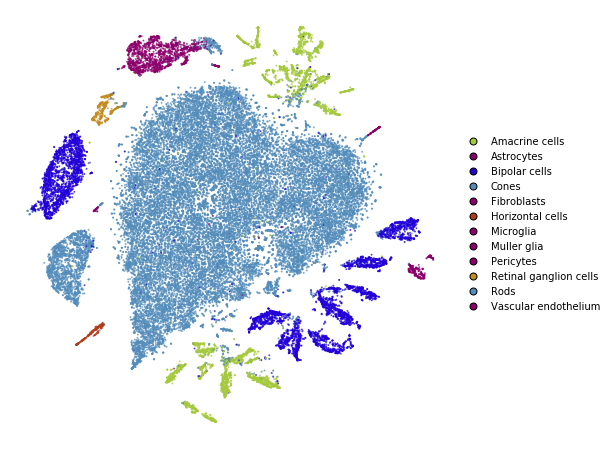

In [9]:
plot(embedding, y)

In [10]:
%time affinities = openTSNE.affinity.PerplexityBasedNN(x, perplexity=30, method="approx", n_jobs=N_THREADS, random_state=3)

CPU times: user 42.3 s, sys: 208 ms, total: 42.5 s
Wall time: 26.1 s


In [11]:
%%time
embedding = openTSNE.TSNEEmbedding(
    openTSNE.initialization.random(x, random_state=3),
    affinities,
    negative_gradient_method="fft",
    n_jobs=N_THREADS,
    callbacks=openTSNE.callbacks.ErrorLogger(),
    random_state=3,
)

embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, momentum=0.8, inplace=True)

Iteration   50, KL divergence  6.9036, 50 iterations in 5.0767 sec
Iteration  100, KL divergence  5.8490, 50 iterations in 4.6882 sec
Iteration  150, KL divergence  5.5915, 50 iterations in 4.7817 sec
Iteration  200, KL divergence  5.5157, 50 iterations in 5.1642 sec
Iteration  250, KL divergence  5.4786, 50 iterations in 4.8063 sec
Iteration   50, KL divergence  4.2040, 50 iterations in 4.8813 sec
Iteration  100, KL divergence  3.8203, 50 iterations in 4.9773 sec
Iteration  150, KL divergence  3.6045, 50 iterations in 5.3570 sec
Iteration  200, KL divergence  3.4581, 50 iterations in 5.3103 sec
Iteration  250, KL divergence  3.3493, 50 iterations in 5.9283 sec
Iteration  300, KL divergence  3.2641, 50 iterations in 6.3240 sec
Iteration  350, KL divergence  3.1953, 50 iterations in 7.0321 sec
Iteration  400, KL divergence  3.1385, 50 iterations in 7.5696 sec
Iteration  450, KL divergence  3.0902, 50 iterations in 7.6971 sec
Iteration  500, KL divergence  3.0497, 50 iterations in 8.0837

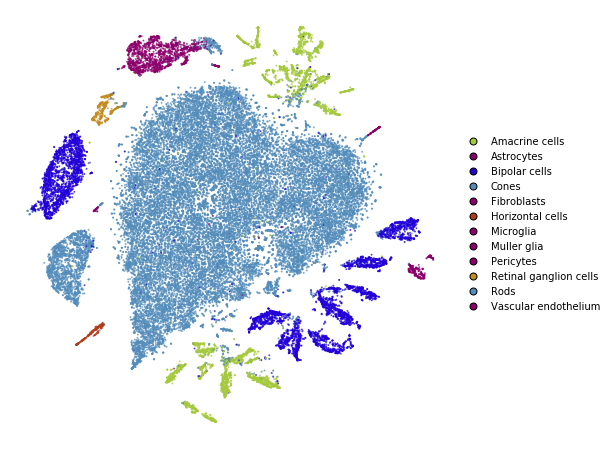

In [12]:
plot(embedding, y)

In [13]:
ordinary_embedding_30 = embedding.view(np.ndarray)

### Ordinary t-SNE with perplexity

In [14]:
%time affinities = openTSNE.affinity.PerplexityBasedNN(x, perplexity=500, method="approx", n_jobs=N_THREADS, random_state=3)

CPU times: user 10min 20s, sys: 440 ms, total: 10min 20s
Wall time: 3min 42s


In [15]:
%%time
embedding = openTSNE.TSNEEmbedding(
    openTSNE.initialization.random(x, random_state=3),
    affinities,
    negative_gradient_method="fft",
    n_jobs=N_THREADS,
    callbacks=openTSNE.callbacks.ErrorLogger(),
    random_state=3,
)

embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, momentum=0.8, inplace=True)

Iteration   50, KL divergence  4.1779, 50 iterations in 25.3916 sec
Iteration  100, KL divergence  3.6062, 50 iterations in 25.0915 sec
Iteration  150, KL divergence  3.4733, 50 iterations in 25.4358 sec
Iteration  200, KL divergence  3.4647, 50 iterations in 25.7202 sec
Iteration  250, KL divergence  3.4617, 50 iterations in 25.5012 sec
Iteration   50, KL divergence  1.9847, 50 iterations in 25.1921 sec
Iteration  100, KL divergence  1.7605, 50 iterations in 26.0311 sec
Iteration  150, KL divergence  1.6580, 50 iterations in 25.2343 sec
Iteration  200, KL divergence  1.5981, 50 iterations in 24.7610 sec
Iteration  250, KL divergence  1.5583, 50 iterations in 26.1104 sec
Iteration  300, KL divergence  1.5312, 50 iterations in 26.0728 sec
Iteration  350, KL divergence  1.5116, 50 iterations in 25.1728 sec
Iteration  400, KL divergence  1.4969, 50 iterations in 25.9328 sec
Iteration  450, KL divergence  1.4862, 50 iterations in 25.5400 sec
Iteration  500, KL divergence  1.4777, 50 iterat

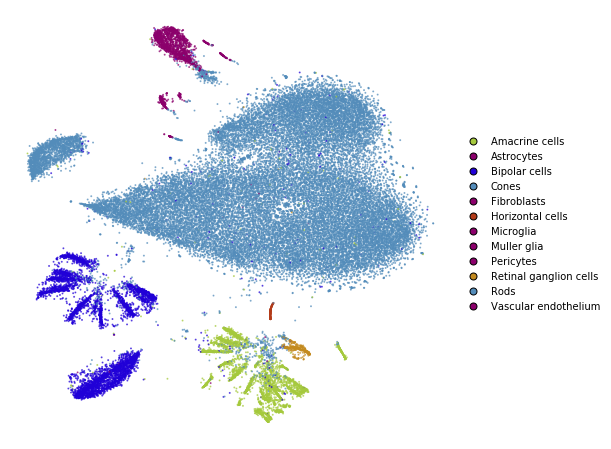

In [16]:
plot(embedding, y)

In [17]:
ordinary_embedding_500 = embedding.view(np.ndarray)

### Multiscale

In [18]:
%%time
affinities = openTSNE.affinity.Multiscale(
    x,
    perplexities=[50, 500],
    metric="cosine",
    method="approx",
    n_jobs=N_THREADS,
    random_state=3,
)

CPU times: user 11min 46s, sys: 4.46 s, total: 11min 50s
Wall time: 3min 55s


In [19]:
%time init = openTSNE.initialization.pca(x, random_state=42)

CPU times: user 716 ms, sys: 2.09 s, total: 2.81 s
Wall time: 283 ms


In [20]:
embedding = openTSNE.TSNEEmbedding(
    init,
    affinities,
    negative_gradient_method="fft",
    n_jobs=N_THREADS,
    callbacks=openTSNE.callbacks.ErrorLogger(),
)

In [21]:
%time embedding1 = embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5)

Iteration   50, KL divergence  4.5452, 50 iterations in 24.1374 sec
Iteration  100, KL divergence  3.9698, 50 iterations in 24.7509 sec
Iteration  150, KL divergence  3.8935, 50 iterations in 24.1341 sec
Iteration  200, KL divergence  3.8668, 50 iterations in 24.6704 sec
Iteration  250, KL divergence  3.8539, 50 iterations in 24.6298 sec
CPU times: user 7min 57s, sys: 1min 28s, total: 9min 26s
Wall time: 2min 3s


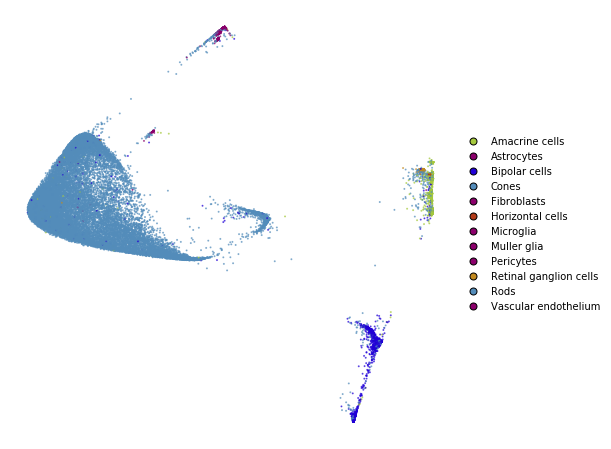

In [22]:
plot(embedding1, y)

In [23]:
%time embedding2 = embedding1.optimize(n_iter=750, momentum=0.8)

Iteration   50, KL divergence  2.6050, 50 iterations in 24.4708 sec
Iteration  100, KL divergence  2.3301, 50 iterations in 24.5998 sec
Iteration  150, KL divergence  2.1883, 50 iterations in 24.7276 sec
Iteration  200, KL divergence  2.0992, 50 iterations in 25.0521 sec
Iteration  250, KL divergence  2.0396, 50 iterations in 24.6656 sec
Iteration  300, KL divergence  1.9954, 50 iterations in 25.1094 sec
Iteration  350, KL divergence  1.9628, 50 iterations in 25.5308 sec
Iteration  400, KL divergence  1.9366, 50 iterations in 24.9663 sec
Iteration  450, KL divergence  1.9166, 50 iterations in 25.3492 sec
Iteration  500, KL divergence  1.9000, 50 iterations in 26.8514 sec
Iteration  550, KL divergence  1.8872, 50 iterations in 25.6067 sec
Iteration  600, KL divergence  1.8762, 50 iterations in 27.0795 sec
Iteration  650, KL divergence  1.8670, 50 iterations in 28.1401 sec
Iteration  700, KL divergence  1.8591, 50 iterations in 28.4183 sec
Iteration  750, KL divergence  1.8524, 50 iterat

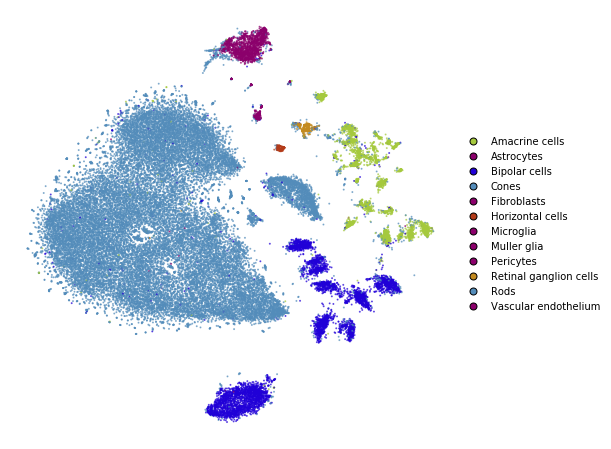

In [24]:
plot(embedding2, y)

In [25]:
multiscale_embedding = embedding2.view(np.ndarray)

## Paper figure

In [26]:
cluster_ids = np.array(data["CellType2"], dtype=float).astype(int)
np.unique(cluster_ids)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [27]:
cluster_cell_mapping = {
    1: "Horizontal cells",
    2: "Retinal ganglion cells",
    24: "Rods",
    25: "Cones",
    34: "Muller glia",
    35: "Astrocytes",
    36: "Fibroblasts",
    37: "Vascular endothelium",
    38: "Pericytes",
    39: "Microglia",
}
for i in range(3, 24):
    cluster_cell_mapping[i] = "Amacrine cells"
for i in range(26, 34):
    cluster_cell_mapping[i] = "Bipolar cells"

In [28]:
cluster_ids_ = [cluster_cell_mapping[yi] if yi in (1, 2, 24, 25, 34, 35, 36, 37, 38, 39) else yi 
                for yi in cluster_ids]
cluster_ids_ = np.array(cluster_ids_)
np.unique(cluster_ids_)

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '4', '5', '6', '7', '8', '9', 'Astrocytes', 'Cones',
       'Fibroblasts', 'Horizontal cells', 'Microglia', 'Muller glia',
       'Pericytes', 'Retinal ganglion cells', 'Rods',
       'Vascular endothelium'], dtype='<U22')

In [29]:
colors = {}
for label in np.unique(cluster_ids_):
    try:
        assert int(label) in cluster_cell_mapping
        colors[label] = utils.MACOSKO_COLORS[cluster_cell_mapping[int(label)]]
    except ValueError:
        colors[label] = utils.MACOSKO_COLORS[label]
        
np.array(list(colors.keys()))

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '4', '5', '6', '7', '8', '9', 'Astrocytes', 'Cones',
       'Fibroblasts', 'Horizontal cells', 'Microglia', 'Muller glia',
       'Pericytes', 'Retinal ganglion cells', 'Rods',
       'Vascular endothelium'], dtype='<U22')

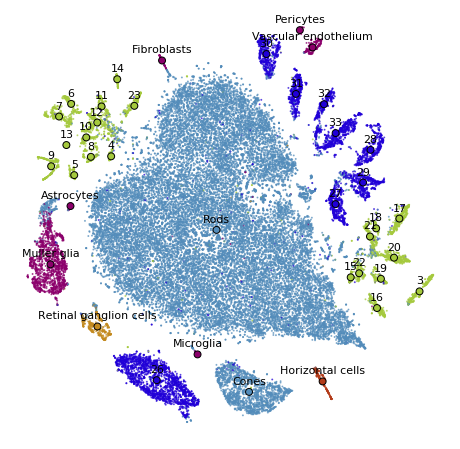

In [30]:
utils.plot(ordinary_embedding_30 @ rotate(-80), cluster_ids_, colors=colors, fontsize=11,
           draw_centers=True, draw_cluster_labels=True, draw_legend=False)

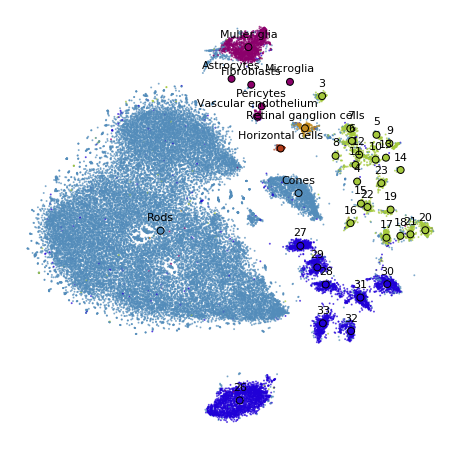

In [31]:
utils.plot(multiscale_embedding, cluster_ids_, colors=colors, fontsize=11,
           draw_centers=True, draw_cluster_labels=True, draw_legend=False)

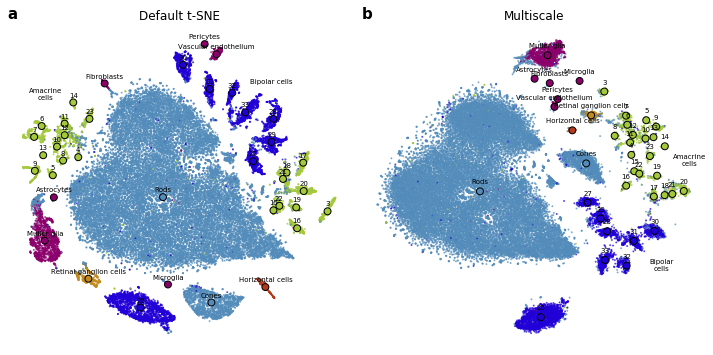

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
utils.plot(ordinary_embedding_30 @ rotate(-90), cluster_ids_, colors=colors, ax=ax[0], fontsize=7,
           title="Default t-SNE", draw_centers=True, draw_cluster_labels=True, draw_legend=False)
utils.plot(multiscale_embedding, cluster_ids_, colors=colors, ax=ax[1], fontsize=7,
           title="Multiscale", draw_centers=True, draw_cluster_labels=True, draw_legend=False)
plt.tight_layout()

plt.text(-52, 40, "Amacrine\ncells", color="k", fontsize=7, horizontalalignment="center", transform=ax[0].transData)
plt.text(43, 47, "Bipolar cells", color="k", fontsize=7, horizontalalignment="center", transform=ax[0].transData)

plt.text(48, 6, "Amacrine\ncells", color="k", fontsize=7, horizontalalignment="center", transform=ax[1].transData)
plt.text(40, -26, "Bipolar\ncells", color="k", fontsize=7, horizontalalignment="center", transform=ax[1].transData)

plt.text(0, 1.02, "a", transform=ax[0].transAxes, fontsize=15, fontweight="bold")
plt.text(0, 1.02, "b", transform=ax[1].transAxes, fontsize=15, fontweight="bold")

plt.savefig("macosko.png", dpi=100, transparent=True)
plt.savefig("macosko.pdf", dpi=600, transparent=True)

## Header image

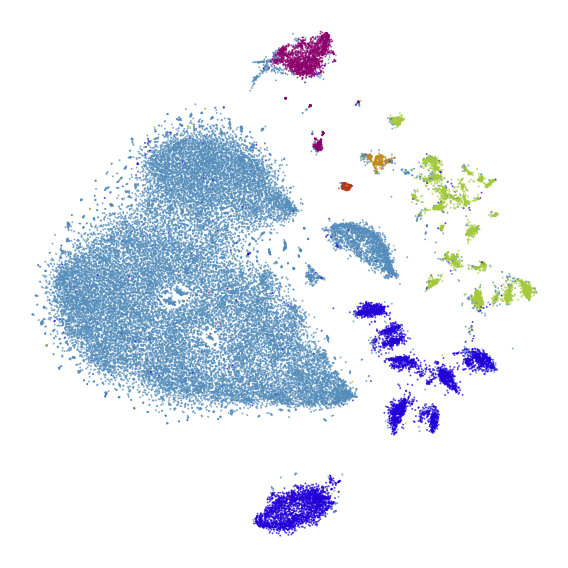

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
utils.plot(
    multiscale_embedding,
    cluster_ids_,
    colors=colors,
    fontsize=11,
    # draw_centers=True,
    # draw_cluster_labels=True,
    draw_legend=False,
    ax=ax,
)

plt.tight_layout()
plt.savefig("macosko_header.png", dpi=100, transparent=True)

## Exaggeration comparison

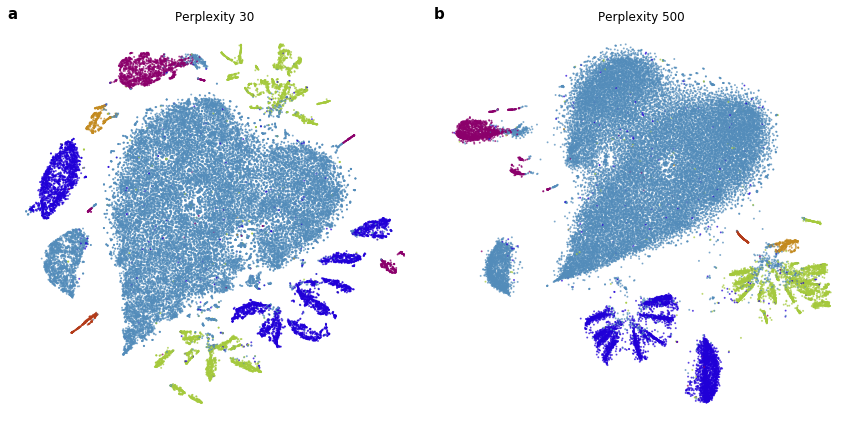

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plot(ordinary_embedding_30, y, title="Perplexity 30", ax=ax[0], draw_legend=False)
plot(ordinary_embedding_500 @ rotate(-50), y, title="Perplexity 500", ax=ax[1], draw_legend=False)
plt.tight_layout()

plt.text(0, 1.02, "a", transform=ax[0].transAxes, fontsize=15, fontweight="bold")
plt.text(0, 1.02, "b", transform=ax[1].transAxes, fontsize=15, fontweight="bold")

plt.savefig("macosko_perplexity.png", dpi=100, transparent=True)
plt.savefig("macosko_perplexity.pdf", dpi=600, transparent=True)